# Testing Stock Trend Predictions based on previous research

## Table of Content

 [1. Introduction](#1-introduction)

 [2. Research Paper](#2-research-paper)

 [3. Implementation](#3-implementation)

 [4. Results](#4-results)
 
 [5. Citation](#5-citations)

### 1. Introduction

In this project I will implement stock trend prediction strategies I found in another research article (Lin et. al. 2021). I will summarize their research and attempt to recreate the trading strategy they used. I will also implement my own ideas to see if my model can perform better than theirs. 

## 2. Research Paper



### Stock Trend Prediction Using Candlestick Charting (Lin et. al. 2021)

Lin et. al. 2021 used a model with multi variable input.
They stated an accuracy of 60% on their sample data.

### Input Variables
The categories of input variables are the following:

#### Technical Indicators:
      - Overlap Indicators:
        - Moving Average
        - Exponential Moving Average
        - Double Exponential Moving Average
        - Kaufman's Adaptive Moving Average
        - Simple Moving Average
        - Parabolic SAR
      - Momentum indicators:
        - Average Directional Movement Index
        - Price Oscillator - Absolute
        - Commodity Channel Index
        - Moving Average Convergence/Divergence
        - Money Flow Index
        - Momentum
        - Relative Strength Index
      - Volume Indicators:
        - Chaikin A/D Line (AD)
        - Chaikin Oscillator
        - On Balance Volume
      - Volatility Indicators
        - True Range
        - Average True Range
        - Normalized Average True Range

#### 8-trigram scheme:
[See Original Paper] (https://www.researchgate.net/publication/353477899_Stock_Trend_Prediction_Using_Candlestick_Charting_and_Ensemble_Machine_Learning_Techniques_With_a_Novelty_Feature_Engineering_Scheme)

#### Historical Stock Data:

For the original paper, researchers tested their model on 3,455 stocks in the Chinese stock market between 2000 and 2017.

For this analysis, we will test the model on a representative sample pooled from NASDAQ, for the periods 2015-2023.

### Predictive Models

The models used in the paper were the following:

- Logistic Regression
- Support Vector Machine
- K Nearest Neighbors
- Random Forest
- Gradient Boosting Decision Tree 
- LSTM 


## 3. Implementation 

The file structure of the project is the following:
```

├── data
│   ├── stocks
│   │   ├── ALL HISTORICAL DATA
├── ensemble_models
│   ├── gb.sav
│   ├── knn.sav
│   ├── rf.sav
│   ├── svm.sav
│   ├── xgb_model.sav
├── ensembel_results
│   ├── ALL SIMULATION RESULTS
├── ensemble.py
├── summary.ipynb
└── .gitignore

```

## 4. Results

Results from the implemented strategy:

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def graph_results(fname,sector= None,order=None):
    df = pd.read_csv(f"ensemble_results//{fname}",index_col=0)
    df.drop(["ticker"],axis=1,inplace=True)
    df.mean().to_frame().T

    df = df.round(2)
    
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    model_names = []
    for col in df.columns:
        model_names.append(col.split("_")[0])
        if col.endswith("_acc"):
            accuracies.append(df[col][0])
        elif col.endswith("_prec"):
            precisions.append(df[col][0])
        elif col.endswith("_recall"):
            recalls.append(df[col][0])
        elif col.endswith("_f1"):
            f1s.append(df[col][0])
    model_names = set(model_names)
    fig,ax = plt.subplots(figsize=(20,12))
    X = np.arange(len(model_names))
    ax = plt.subplot(order)
    acc = plt.bar(X+0, accuracies,color='b',width=0.20,label="Accuracy")
    prec = plt.bar(X+0.25, precisions,color='r',width=0.20,label="Precision")
    recall = plt.bar(X+0.5, recalls,color='g',width=0.20,label="Recall")
    f1_score = plt.bar(X+0.75, f1s,color='y',width=0.20,label="F1")
    ax.bar_label(acc, padding=3)
    ax.bar_label(prec, padding=3)
    ax.bar_label(recall, padding=3)
    ax.bar_label(f1_score, padding=3)
    plt.axhline(y=0.6,linewidth=1, color='k')
    ax.set_xticks(X+0.25, model_names)
    ax.set_title(sector)
    ax.legend(loc="lower right")
    
    return ax

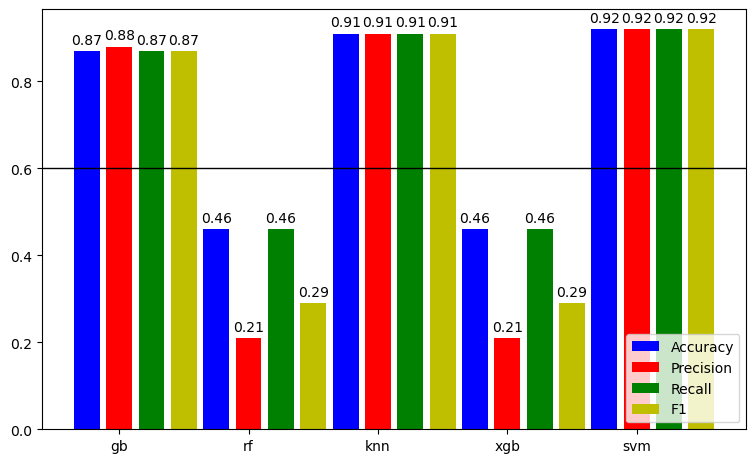

In [60]:
# df = pd.read_csv("ensemble_results//N1000_15-23CL2(OMV)D5_T.csv", index_col=0)
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# x = df.mean().keys().tolist()
# print(x)
# ax.bar( x,df.mean().values)

graph_results("N1000_15-23CL2(OMV)D5_T.csv",order=221);

## 5. Citations
Lin, Yaohu & Lin, Shancun & Yang, Haijun & Wu, Harris. (2021). Stock Trend Prediction Using Candlestick Charting and Ensemble Machine Learning Techniques With a Novelty Feature Engineering Scheme. IEEE Access. 9. 101433-101446. 10.1109/ACCESS.2021.3096825. 